# 인구 총계 <성별, 나이별, 행정도시별>
- http://stat.daegu.go.kr/basicStats/moisPrsnInfo.do
- 9월 데이터 아직 없음  ->  8월데이터로 대체

In [1]:
import json
import csv
import sys
from datetime import datetime, timedelta
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
plt.rc('font', family='Malgun Gothic')

In [2]:
total_korea_people = {  '1':pd.read_csv('files/전체인원1월.csv',encoding = 'euc-kr'),
                        '2':pd.read_csv('files/전체인원2월.csv',encoding = 'euc-kr'),
                        '3':pd.read_csv('files/전체인원3월.csv',encoding = 'euc-kr'),
                        '4':pd.read_csv('files/전체인원4월.csv',encoding = 'euc-kr'),
                        '5':pd.read_csv('files/전체인원5월.csv',encoding = 'euc-kr'),
                        '6':pd.read_csv('files/전체인원6월.csv',encoding = 'euc-kr'),
                        '7':pd.read_csv('files/전체인원7월.csv',encoding = 'euc-kr'),
                        '8':pd.read_csv('files/전체인원8월.csv',encoding = 'euc-kr'),
                        '9':pd.read_csv('files/전체인원8월.csv',encoding = 'euc-kr'),
                        '10':pd.read_csv('files/전체인원8월.csv',encoding = 'euc-kr')
                     }

In [3]:
for month,total_korea_month in total_korea_people.items():
    total_korea_month['행정구역'] = ['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시',
                                  '대전광역시','울산광역시','세종특별자치시','경기도','강원도'  ,'충청북도',
                                  '충청남도' ,'전라북도' ,'전라남도' ,'경상북도' ,'경상남도' ,'제주특별자치도']
    if (month == '9' or month == '10'):
        month = 8
    del total_korea_month[f'2020년0{month}월_계_총인구수']
    del total_korea_month[f'2020년0{month}월_계_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_계_0~9세']
    del total_korea_month[f'2020년0{month}월_계_10~19세']
    del total_korea_month[f'2020년0{month}월_계_20~29세']
    del total_korea_month[f'2020년0{month}월_계_30~39세']
    del total_korea_month[f'2020년0{month}월_계_40~49세']
    del total_korea_month[f'2020년0{month}월_계_50~59세']
    del total_korea_month[f'2020년0{month}월_계_60~69세']
    del total_korea_month[f'2020년0{month}월_계_70~79세']
    del total_korea_month[f'2020년0{month}월_계_80~89세']
    del total_korea_month[f'2020년0{month}월_계_90~99세']
    del total_korea_month[f'2020년0{month}월_계_100세 이상']
    del total_korea_month[f'2020년0{month}월_남_총인구수']
    del total_korea_month[f'2020년0{month}월_남_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_여_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_여_총인구수']
    total_korea_month.columns = ['행정구역','남_0대','남_10대','남_20대','남_30대','남_40대','남_50대','남_60대',
                              '남_70대','남_80대','남_90대','남_100대','여_0대','여_10대','여_20대','여_30대',
                              '여_40대','여_50대','여_60대','여_70대','여_80대','여_90대','여_100대'
                             ]

In [4]:
for month,total_korea_month in total_korea_people.items():
    if (month == '9' or month == '10'):
        month = 8
    for col in list(total_korea_month.columns):
        total_korea_month[col] = total_korea_month[col].str.replace(',','')
        if(col != '행정구역'):
            total_korea_month[col] = total_korea_month[col].apply(pd.to_numeric)

In [5]:
for month,total_korea_month in total_korea_people.items():
    if (month == '9' or month == '10'):
        month = 8
    for col in list(total_korea_month.columns):
        total_korea_month['남_80대이상'] = total_korea_month['남_80대'] + total_korea_month['남_90대'] + total_korea_month['남_100대']
        total_korea_month['여_80대이상'] = total_korea_month['여_80대'] + total_korea_month['여_90대'] + total_korea_month['여_100대']
    del total_korea_month['남_90대']
    del total_korea_month['남_100대']
    del total_korea_month['여_90대']
    del total_korea_month['여_100대']

### 확인하고 싶은 달

In [6]:
month = '2'
total_korea_people[month][total_korea_people[month]['행정구역']=='경기도']

,행정구역,남_0대,남_10대,남_20대,남_30대,남_40대,남_50대,남_60대,남_70대,남_80대,여_0대,여_10대,여_20대,여_30대,여_40대,여_50대,여_60대,여_70대,여_80대,남_80대이상,여_80대이상
9,경기도,603777,694030,930000,985563,1167869,1118496,706269,335460,118498,574771,653824,839080,932222,1131310,1086610,716369,406836,211733,131242,251649


# 경기도 제공 확진자 수 데이터
http://www.gidcc.or.kr/%EC%BD%94%EB%A1%9C%EB%82%98covid-19-%ED%98%84%ED%99%A9/

In [7]:
covid_file_name = 'files/covid_gyeonggido_0924.csv'
covid_df = pd.read_csv(covid_file_name)

In [8]:
covid_df['확진일자'] = covid_df['확진일자'].apply(lambda x: datetime.strptime(x.replace(".","").replace(" ","-"), '%Y-%m-%d'))

In [9]:
covid_df.columns

Index(['기준일(발병일, 확진일 선택)', '지역 + 시 ', '필터(무증상,조사중 제외)', 'GRP', '감염경로', '경기번호',
       '구분', '구분2', '나이(만)', '무증상/조사중', '무증상/조사중 기준일', '성별', '연령대', '연령대별 비율',
       '연번', '재검출', '증상발현일', '지역', '지역 (group)', '필터(무증상,조사중 제외)(복사본)',
       '확진일-증상발현일', '확진일-증상발현일_무증상조사중포함', '확진일자', '확진자', '레코드 수', '무증상자수',
       '최종_무증상자수'],
      dtype='object')

In [10]:
def draw_covid_df_countplot(x:str, df):
#     plt.figure(figsize=(20,10))
    sns.countplot(x=x, hue='성별', data=df)

In [11]:
del covid_df['연번']
del covid_df['확진자']
del covid_df['무증상/조사중']
del covid_df['경기번호']
del covid_df['감염경로']
del covid_df['GRP']
del covid_df['구분2']
del covid_df['구분']
del covid_df['기준일(발병일, 확진일 선택)']
del covid_df['무증상/조사중 기준일']

# 20대 월별

In [12]:
covid_df['확진월']=0
covid_df['확진월'] = covid_df['확진일자'].apply(lambda x: x.month)

In [13]:
total_month = list(set(covid_df['확진월']))
total_age = list(set(covid_df['연령대']))

In [14]:
total_arr = []
for month in total_month:
    for age in total_age:
        temp_dict = {}
        affected=0
        cond1 = covid_df['확진월'] == month
        cond2 = covid_df['연령대'] == age
        affected = len(covid_df[cond1 & cond2])
        temp_dict['month']=month
        temp_dict['age']=age
        temp_dict['affected']=affected
        total_arr.append(temp_dict)
total_df = pd.DataFrame(total_arr)

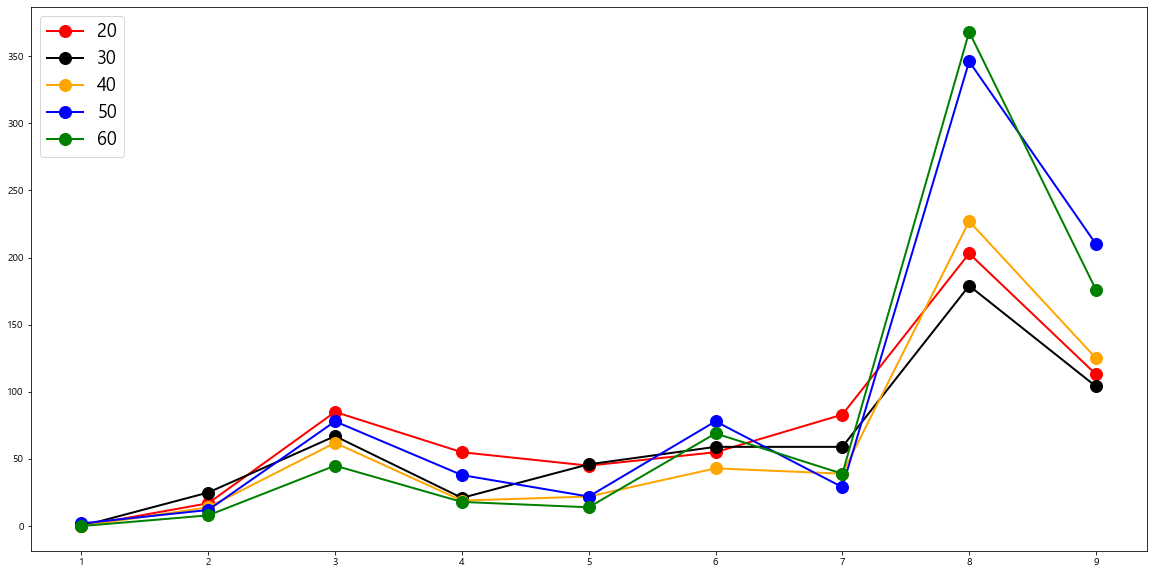

In [15]:
plt.figure(figsize=(20,10))
plt.plot( 'month','affected' ,data=total_df[total_df['age']==20], marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==30], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==40], marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==50], marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==60], marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=2)
plt.legend(loc='upper left',labels=('20','30','40','50','60'), fontsize=18)

# X_데이터 생성

### 전체 인원 연령별 세팅

In [16]:
days_idx = pd.date_range('2020-01-20', end='2020-10-04')

In [17]:
def set_total_people(days, age):
    temp_series = []
    for date in days:
        temp_series.append(
            total_korea_people[str(date.month)][total_korea_people[str(date.month)]['행정구역']=='경기도']['남_'+ age][9]
            + total_korea_people[str(date.month)][total_korea_people[str(date.month)]['행정구역']=='경기도']['여_'+ age][9]
        )       
    return temp_series

In [18]:
x_data = pd.DataFrame({"days":days_idx,
                       "0_age":set_total_people(days_idx,'0대'),
                       "10_age":set_total_people(days_idx,'10대'),
                       "20_age":set_total_people(days_idx,'20대'),
                       "30_age":set_total_people(days_idx,'30대'),
                       "40_age":set_total_people(days_idx,'40대'),
                       "50_age":set_total_people(days_idx,'50대'),
                       "60_age":set_total_people(days_idx,'60대'),
                       "70_age":set_total_people(days_idx,'70대'),
                       "80_age":set_total_people(days_idx,'80대')
                      })
x_data = x_data.set_index('days')

### 사회적 거리두기(정부의 시행)
|기간|내용|점수|
|------|:---|---|
|01.15 ~ 03.21| 특별한 조치 없음 |   0  |
|03.22 ~ 04.19| 정부, 종교 실내체육 유흥시설 운영중단 강력권고|   1  |
|04.20 ~ 05.05| 완화된 사회적 거리두기|2|
|05.06 ~ 08.15| 생활 속 거리두기|3|
|08.16 ~ 08.22| 2단계, 서울 경기 인천지역 사회적 거리두기 조치|4|
|08.23 ~ 09.03| 2단계 전국 확산|4|
|09.04 ~ 09.13| 2.5단계, 수도권 사회적 거리두기| 5|
|09.14 ~ 09.27| 2단계, 수도권 거리두기 완화|4|

### 예측
> 기간: 09.28 ~ 10.04
> 내용: 2단계, 수도권 거리두기 완화  
> 점수: 4

In [19]:
def append_points(arr,days,points):
    for i in days:
        arr.append(points)
    return arr
    
def set_goverment_point():
    temp_series = []
    social_days_0 = pd.date_range('2020-01-20', end='2020-03-21')    
    social_days_1 = pd.date_range('2020-03-22', end='2020-04-19')    
    social_days_2 = pd.date_range('2020-04-20', end='2020-05-05')    
    social_days_3 = pd.date_range('2020-05-06', end='2020-08-15')    
    social_days_4 = pd.date_range('2020-08-16', end='2020-09-03')
    social_days_5 = pd.date_range('2020-09-04', end='2020-09-13')    
    social_days_4_1 = pd.date_range('2020-09-14', end='2020-10-04')    
    temp_series = append_points(temp_series,social_days_0,0)
    temp_series = append_points(temp_series,social_days_1,1)
    temp_series = append_points(temp_series,social_days_2,2)
    temp_series = append_points(temp_series,social_days_3,3)
    temp_series = append_points(temp_series,social_days_4,4)
    temp_series = append_points(temp_series,social_days_5,5)
    temp_series = append_points(temp_series,social_days_4_1,4)
    return temp_series

In [20]:
x_data['goverment'] = set_goverment_point()

### 주말체크

In [21]:
weekend = [] 
for i in range(0,37):
    for j in range(0,5):
        weekend.append(0)
    for k in range(0,2):
        weekend.append(2)
weekend.pop()
weekend.pop()
weekend.append(0)
weekend.append(0)
x_data['weekend'] = weekend

### 연휴 체크
- 설날 01-24 ~ 01-27 목금토일
- 선거 04-15 수
- 부처님오신날 04-30 목
- 어린이날 05-05 화
- 광복절 대체 휴무 08-17 월
- 추석 09-30 ~ 10-04 수목금토일

In [22]:
x_data.loc['2020-01-24','weekend'] = 3
x_data.loc['2020-01-25','weekend'] = 3
x_data.loc['2020-01-26','weekend'] = 3
x_data.loc['2020-01-27','weekend'] = 3
x_data.loc['2020-04-15','weekend'] = 1
x_data.loc['2020-04-30','weekend'] = 1
x_data.loc['2020-05-05','weekend'] = 1
x_data.loc['2020-08-17','weekend'] = 2
x_data.loc['2020-09-30','weekend'] = 4
x_data.loc['2020-10-01','weekend'] = 4
x_data.loc['2020-10-02','weekend'] = 4
x_data.loc['2020-10-03','weekend'] = 4
x_data.loc['2020-10-04','weekend'] = 4

In [23]:
x_data.head()

,0_age,10_age,20_age,30_age,40_age,50_age,60_age,70_age,80_age,goverment,weekend
days,,,,,,,,,,,
2020-01-20,1180483,1351772,1771845,1920085,2294108,2201660,1410184,740409,327622,0,0
2020-01-21,1180483,1351772,1771845,1920085,2294108,2201660,1410184,740409,327622,0,0
2020-01-22,1180483,1351772,1771845,1920085,2294108,2201660,1410184,740409,327622,0,0
2020-01-23,1180483,1351772,1771845,1920085,2294108,2201660,1410184,740409,327622,0,0
2020-01-24,1180483,1351772,1771845,1920085,2294108,2201660,1410184,740409,327622,0,3


### 코로나 기간 중 확산 사건
- https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%BD%94%EB%A1%9C%EB%82%98%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4%EA%B0%90%EC%97%BC%EC%A6%9D-19%20%EA%B4%80%EB%A0%A8%20%EC%82%AC%EA%B1%B4%EC%82%AC%EA%B3%A0


|기간|내용|감염자수|점수|
|------|:---|---|---|
|03.10 ~ 03.25| 구로 콜센터|162 |3|
|05.06 ~ 05.26| 이태원 클럽 |255|   5  |
|05.25 ~ 06.19| 쿠팡 부천 물류센터|158| 3|
|06.03 ~ 07.03| 다단계 리치웨이|210 |4|
|08.14 ~ 09.06| 파주 스타벅스 사건|70| 2 |
|08.18 ~ 09.11| 광화문 집회 |557| 10 |


### 추석기간
|날짜|세부날짜|설명|점수|
|------|:---|:---| ---|
|09.30| 첫째날 | 유출인구가 많고 차에서 보내는 시간이 훨씬 많을것으로 예상|3|
|10.01| 추석 당일 | 가족, 친척간에 모여있을 확률이 높음  |5 |
|10.02| 추석 복귀 | 유입인구가 많고 차에서 보내는 시간이 훨씬 많을것으로 예상  | 4 |
|10.03| 주말 | 평범한 주말과 같은 휴식을 취함 |2|
|10.04| 연휴 마지막날|유동인구로 인한 코로나의 평균 잠복기가 지남 | 6 |

In [24]:
def diffusion_issue(x_data, start_date, end_date, point):
    dates = pd.date_range(start_date, end=end_date)    
    for date in dates:
        temp = x_data.loc[date,'issues']
        temp += point
        x_data.loc[date,'issues'] = temp
    return x_data

In [25]:
x_data['issues'] =0
starts = ['2020-03-10','2020-05-06','2020-05-25','2020-06-03','2020-08-14','2020-08-18']
ends = ['2020-03-25','2020-05-26','2020-06-19','2020-07-03','2020-09-06','2020-09-11']
points = [3,5,3,4,2,10]

for i, _ in enumerate(starts):
    start = datetime.strptime(starts[i], '%Y-%m-%d')
    end = datetime.strptime(ends[i], '%Y-%m-%d')
    point = points[i]
    x_data = diffusion_issue(x_data, start, end, point)


thanks_giving_days =  ['2020-09-30','2020-10-04']
start_thanks = datetime.strptime(thanks_giving_days[0], '%Y-%m-%d')
end_thanks = datetime.strptime(thanks_giving_days[1], '%Y-%m-%d')
points = [3,5,4,2,6]
dates = pd.date_range(start_thanks, end=end_thanks)

for i,point in enumerate(points):
    x_data.loc[dates[i],'issues'] = point

# Y_시계열 데이터 생성

In [26]:
days_idx = pd.date_range('2020-01-20', end='2020-10-04')

In [27]:
y_confirm_cases = pd.DataFrame({"days":days_idx,
                                 "confirmed_0":0,
                                 "confirmed_10":0,
                                 "confirmed_20":0,
                                 "confirmed_30":0,
                                 "confirmed_40":0,
                                 "confirmed_50":0,
                                 "confirmed_60":0,
                                 "confirmed_70":0,
                                 "confirmed_80":0,
                                })
y_confirm_cases = y_confirm_cases.set_index('days')
y_confirm_cases.head()

,confirmed_0,confirmed_10,confirmed_20,confirmed_30,confirmed_40,confirmed_50,confirmed_60,confirmed_70,confirmed_80
days,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0


In [28]:
confirmed_cases_date_age = pd.DataFrame({"confirm_date":covid_df['확진일자'], "confirm_age":covid_df['연령대']})
for date in days_idx:
    for j in range(0, len(confirmed_cases_date_age)):
        if(date == confirmed_cases_date_age['confirm_date'][j]):
            age = confirmed_cases_date_age['confirm_age'][j]
            if(age == 0):
                temp = y_confirm_cases['confirmed_0'][date]
                temp += 1
                y_confirm_cases['confirmed_0'][date] = temp
            elif(age == 10):
                temp = y_confirm_cases['confirmed_10'][date]
                temp += 1
                y_confirm_cases['confirmed_10'][date] = temp
            elif(age == 20):
                temp = y_confirm_cases['confirmed_20'][date]
                temp += 1
                y_confirm_cases['confirmed_20'][date] = temp
            elif(age == 30):
                temp = y_confirm_cases['confirmed_30'][date]
                temp += 1
                y_confirm_cases['confirmed_30'][date] = temp
            elif(age == 40):
                temp = y_confirm_cases['confirmed_40'][date]
                temp += 1
                y_confirm_cases['confirmed_40'][date] = temp
            elif(age == 50):
                temp = y_confirm_cases['confirmed_50'][date]
                temp += 1
                y_confirm_cases['confirmed_50'][date] = temp
            elif(age == 60):
                temp = y_confirm_cases['confirmed_60'][date]
                temp += 1
                y_confirm_cases['confirmed_60'][date] = temp
            elif(age == 70):
                temp = y_confirm_cases['confirmed_70'][date]
                temp += 1
                y_confirm_cases['confirmed_70'][date] = temp
            elif(age >= 80):
                temp = y_confirm_cases['confirmed_80'][date]
                temp += 1
                y_confirm_cases['confirmed_80'][date] = temp

# 예측모델

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

x_data_use = x_data[:248]
y_confirm_cases_use = y_confirm_cases[:248]

thanks_giving_day = x_data[254:]

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    x_data_use, y_confirm_cases_use, test_size=0.3, random_state=2
)
sc.fit(x_data)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

thanks_giving_day_std = sc.transform(thanks_giving_day)
test_index = sorted(X_test.index)

### 로지스틱

In [30]:
def get_val(model,x_train, y_train, y_test, y_pred):
    print(f"SCORE: {model.score(x_train,y_train)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f'R2_SCORE: {r2_score(y_test, y_pred)}')

def get_confirmed_case(y):
    arr = []
    for i, y_i in enumerate(np.array(y)):
        arr.append(sum(y_i))
    return arr

def show_test_pred(data, title):
    plt.figure(figsize=(20,10))
    plt.plot('date','test', data=data, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=2)
    plt.plot('date','pred', data=data, marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=2)
    plt.title(title,fontsize=20)
    plt.legend(loc='upper right',labels=('TRUE','PREDICT'), fontsize=18)    

In [31]:
regr_multirf = MultiOutputRegressor(LogisticRegression(solver='liblinear', multi_class='auto', C=100.0))
regr_multirf.fit(X_train_std, y_train)
y_pred = regr_multirf.predict(X_test_std)

In [32]:
get_val(regr_multirf, X_train_std, y_train, y_test, y_pred)

SCORE: 0.36943686445738594
MSE: 5.805925925925926
MAE: 1.2014814814814816
R2_SCORE: 0.4241273216737462


In [33]:
test = get_confirmed_case(y_test)
pred = get_confirmed_case(y_pred)
result = pd.DataFrame({"test":test, "pred":pred, "date":test_index})

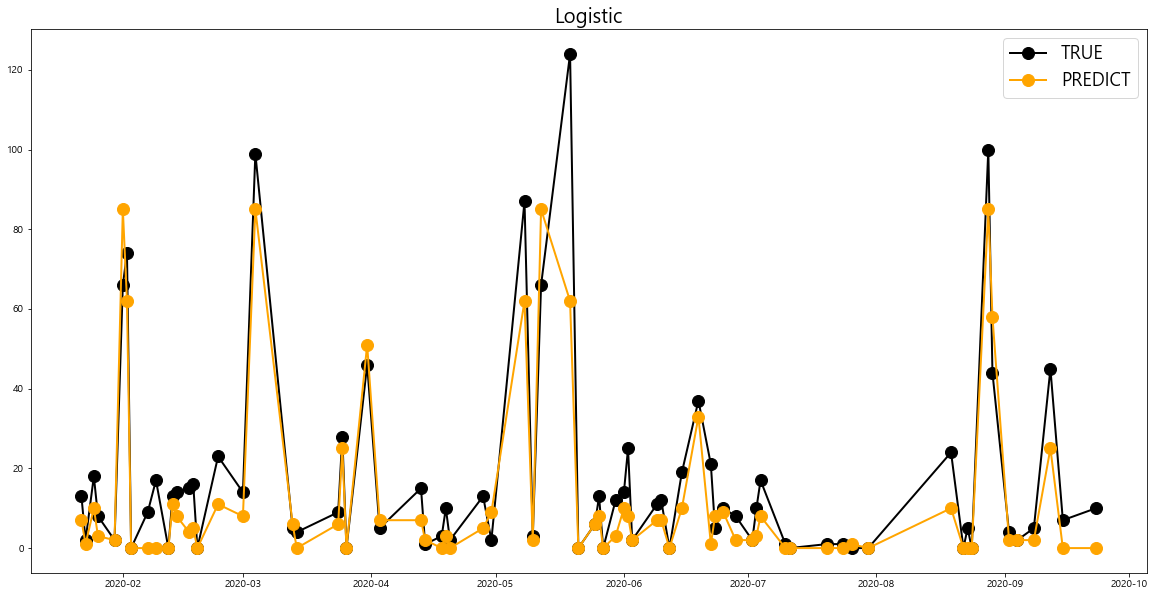

In [34]:
show_test_pred(result, "Logistic")

### 그레디언트 부스팅

In [35]:
gbr = GradientBoostingRegressor()
gbrm = MultiOutputRegressor(estimator=gbr)
gbrm.fit(X_train_std, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [36]:
y_pred = gbrm.predict(X_test_std)

In [37]:
get_val(gbrm, X_train_std, y_train, y_test, y_pred)

SCORE: 0.7114876709043555
MSE: 4.686574097938159
MAE: 1.180144637158977
R2_SCORE: 0.58389276188013


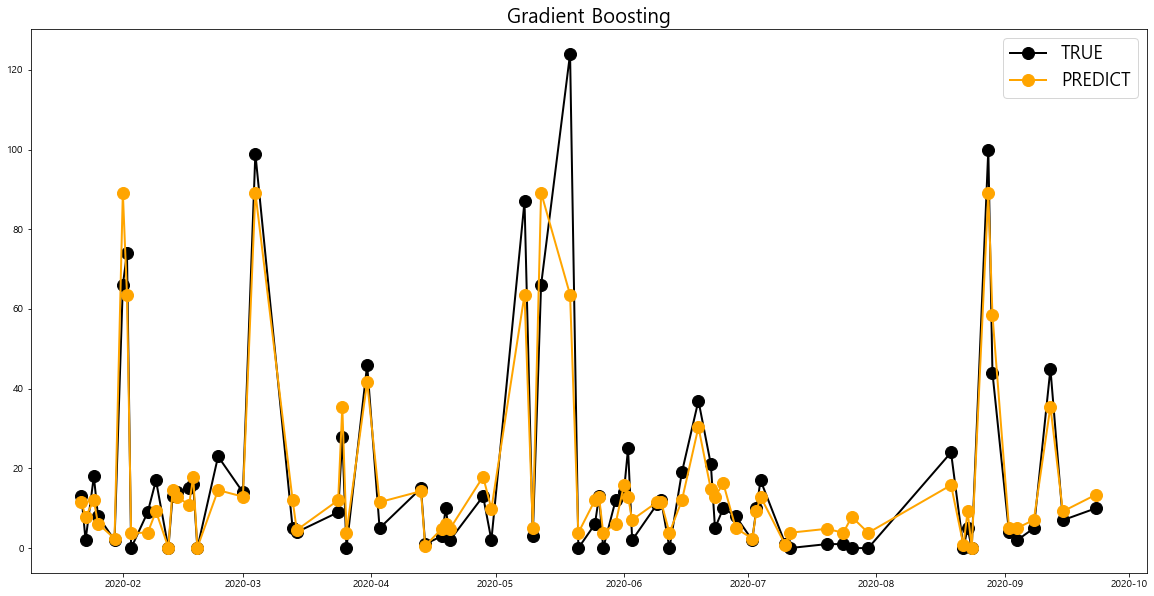

In [38]:
test = get_confirmed_case(y_test)
pred = get_confirmed_case(y_pred)
result = pd.DataFrame({"test":test, "pred":pred, "date":test_index})
show_test_pred(result, 'Gradient Boosting')

# 명절 기간 확진자 수 예측

In [39]:
thanks_giving_day_confirmed = gbrm.predict(thanks_giving_day_std)
thanks_giving_day_list = ['2020-09-30','2020-10-01','2020-10-02','2020-10-03','2020-10-04',]
for i, day in enumerate(thanks_giving_day_confirmed):
    
    print(f'{thanks_giving_day_list[i]}: {np.round(sum(day))}')

2020-09-30: 65.0
2020-10-01: 58.0
2020-10-02: 58.0
2020-10-03: 66.0
2020-10-04: 50.0


### LinearSVR

In [42]:
lsvr = LinearSVR()
lsvrm = MultiOutputRegressor(lsvr)
lsvrm.fit(X_train_std, y_train)
y_pred = lsvrm.predict(X_test_std)

In [43]:
get_val(lsvrm, X_train_std, y_train, y_test, y_pred)

SCORE: 0.3198279000815172
MSE: 6.917847299595053
MAE: 1.305672014895643
R2_SCORE: 0.38571409790288547


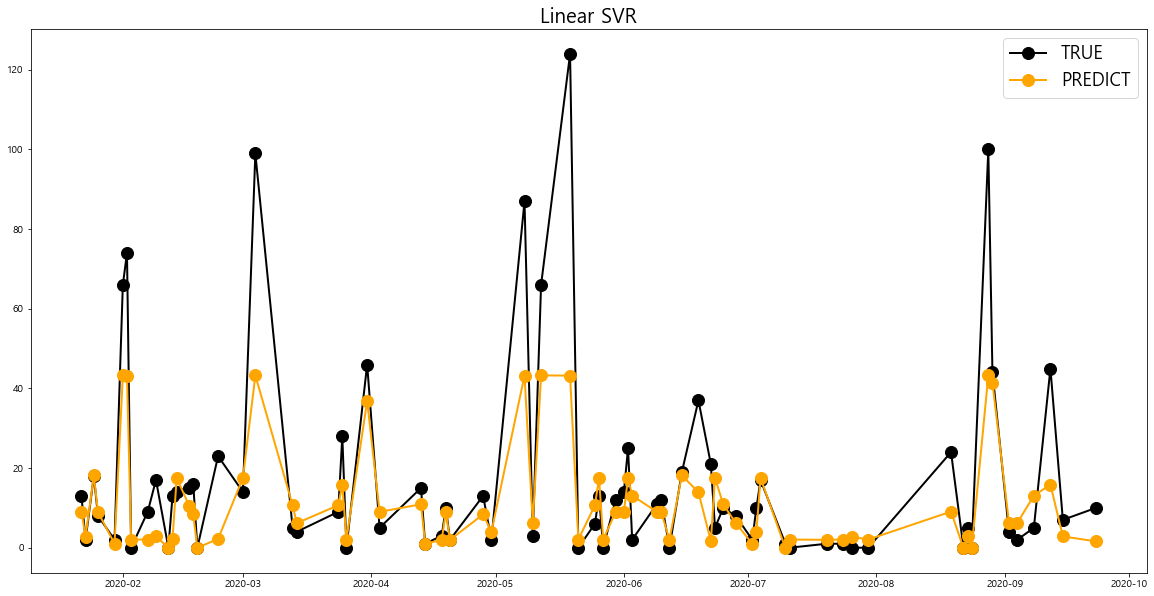

In [44]:
test = get_confirmed_case(y_test)
pred = get_confirmed_case(y_pred)
result = pd.DataFrame({"test":test, "pred":pred, "date":test_index})

show_test_pred(result, 'Linear SVR')